In [4]:
# Run to install dependencies needed to run the codeblocks not needed if installed from requirements.txt
#%pip install boto3 pandas matplotlib seaborn

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c6/c8/6936e8c7b279a5abac82f399d8d72ac25da530cf5f78a0e40063e492558c/matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/d6/4f/76d0dd0bca417691918484c26c74dd9dd44fbf528bbfeb30d754886e2c54/contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packag


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import boto3
import pandas as pd
import io

import config

In [6]:

# some initial variables
bucket_name = "tkh-nyc-intrusions"
object_key = "merged_output.csv"

# open client
client = boto3.client('s3',
                      aws_access_key_id=config.aws_access_key_id,
                      aws_secret_access_key=config.aws_secret_access_key)

# retrieve objects in S3 bucket
response = client.get_object(
    Bucket=bucket_name,
    Key=object_key,
)

# read in data from request
data = response['Body'].read()

# transform into pandas dataframe by reading in bytes
df = pd.read_csv(io.BytesIO(data))

# print head
print(df)



C:\Users\salma\AppData\Local\Temp\ipykernel_19816\1200629579.py:20: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(data))


                          @timestamp       type dest_port geoip.country_code3  \
0         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
1         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
2         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
3         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
4         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
...                              ...        ...       ...                 ...   
5735747  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735748  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735749  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735750  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735751  May 16, 2024 @ 19:00:03.000  Honeytrap     33280                 NaN   

          geoip.city_name g

In [ ]:
df.head()

,@timestamp,type,dest_port,geoip.country_code3,geoip.city_name,geoip.country_name,geoip.ip,geoip.latitude,geoip.longitude,geoip.country_code2
0,"May 9, 2024 @ 12:00:00.000",P0f,28015,US,-,United States,199.45.155.25,37.75,-97.812,NaN
1,"May 9, 2024 @ 12:00:00.000",P0f,28015,US,-,United States,199.45.155.25,37.75,-97.812,NaN
2,"May 9, 2024 @ 12:00:00.000",P0f,28015,US,-,United States,199.45.155.25,37.75,-97.812,NaN
3,"May 9, 2024 @ 12:00:00.000",P0f,28015,US,-,United States,199.45.155.25,37.75,-97.812,NaN
4,"May 9, 2024 @ 12:00:00.000",P0f,28015,US,-,United States,199.45.155.25,37.75,-97.812,NaN


In [ ]:
df.columns

Index(['@timestamp', 'type', 'dest_port', 'geoip.country_code3',
       'geoip.city_name', 'geoip.country_name', 'geoip.ip', 'geoip.latitude',
       'geoip.longitude', 'geoip.country_code2'],
      dtype='object')

In [ ]:
df.dtypes

@timestamp             object
type                   object
dest_port              object
geoip.country_code3    object
geoip.city_name        object
geoip.country_name     object
geoip.ip               object
geoip.latitude         object
geoip.longitude        object
geoip.country_code2    object
dtype: object

In [ ]:
df.info

<bound method DataFrame.info of                           @timestamp       type dest_port geoip.country_code3  \
0         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
1         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
2         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
3         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
4         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
...                              ...        ...       ...                 ...   
5735747  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735748  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735749  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735750  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735751  May 16, 2024 @ 19:00:03.000  Honeytrap     33280                 NaN

In [ ]:
df.describe()

,@timestamp,type,dest_port,geoip.country_code3,geoip.city_name,geoip.country_name,geoip.ip,geoip.latitude,geoip.longitude,geoip.country_code2
count,5735752,5735752,5735752,1070462,5735752,5735752,5735752,5735752,5735752,4665290
unique,947933,20,65370,85,898,105,10134,809,862,95
top,"May 9, 2024 @ 22:14:53.000",Suricata,445,US,-,-,-,-,-,-
freq,1460,2690570,605198,354284,3224922,1408994,1408668,1408994,1408994,1195828


## Clean dataset

Some missing dataset which we will clean by removing unlabeled columns.

<Axes: xlabel='geoip.country_code2', ylabel='Count'>

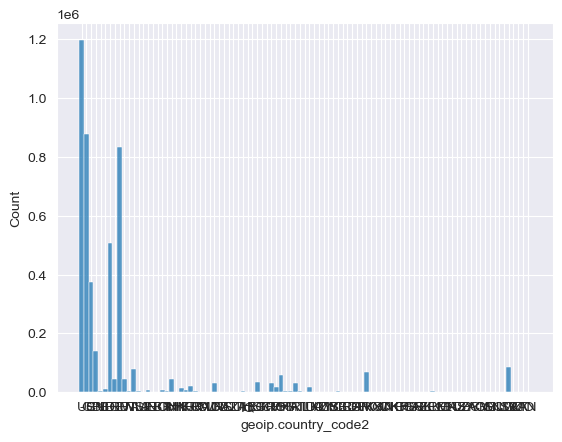

In [ ]:
sns.histplot(df["geoip.country_code2"])

In [ ]:
#df.drop(['Unnamed: 15'], axis=1, inplace=True)

In [ ]:
df.replace("-", np.nan, inplace= True)

In [ ]:
print(df)

                          @timestamp       type dest_port geoip.country_code3  \
0         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
1         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
2         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
3         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
4         May 9, 2024 @ 12:00:00.000        P0f     28015                  US   
...                              ...        ...       ...                 ...   
5735747  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735748  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735749  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735750  May 16, 2024 @ 19:00:03.000        P0f     33280                 NaN   
5735751  May 16, 2024 @ 19:00:03.000  Honeytrap     33280                 NaN   

          geoip.city_name g

In [ ]:
df.isna().sum()

@timestamp                   0
type                         0
dest_port                32028
geoip.country_code3    4878456
geoip.city_name        3224922
geoip.country_name     1408994
geoip.ip               1408668
geoip.latitude         1408994
geoip.longitude        1408994
geoip.country_code2    2266290
dtype: int64

In [ ]:
#dropped null values, and replaced the null values in country_code2 with values from contry_code3
df['geoip.country_code2']= df['geoip.country_code2'].fillna(df['geoip.country_code3'])

In [ ]:
df.size

57357520

In [ ]:
df.isna().sum()

@timestamp                   0
type                         0
dest_port                32028
geoip.country_code3    4878456
geoip.city_name        3224922
geoip.country_name     1408994
geoip.ip               1408668
geoip.latitude         1408994
geoip.longitude        1408994
geoip.country_code2    1408994
dtype: int64

In [ ]:
df.drop(['geoip.country_code3'], axis=1, inplace=True)

In [ ]:
df.isna().sum()

@timestamp                   0
type                         0
dest_port                32028
geoip.city_name        3224922
geoip.country_name     1408994
geoip.ip               1408668
geoip.latitude         1408994
geoip.longitude        1408994
geoip.country_code2    1408994
dtype: int64

In [ ]:
#renamed the columns to be more legible
df = df.rename(columns={'@timestamp': 'time','geoip.city_name' : 'city', 'geoip.country_name':'country', 'geoip.ip': 'ip', 'geoip.latitude': 'latitude', 'geoip.longitude': 'longitude', 'geoip.country_code2':'country_code' })

In [ ]:
df.columns

Index(['time', 'type', 'dest_port', 'city', 'country', 'ip', 'latitude',
       'longitude', 'country_code'],
      dtype='object')

## Data Dictionary

- **time (object)**: Represents the date and time of the intrusion event in "MM/DD/YY HH:MM" format.
- **type (object)**: The identifier of the host system where the intrusion event occurred.
- **dest_port (object)**: The communication protocol used in the intrusion event, such as TCP or UDP.
- **city (object)**: The source port number used by the intruder.
- **country (object)**: The destination port number on the host where the intrusion occurred.
- **ip (object)**: The source IP address of the intrusion.
- **latitude (object)**: The country code representing the country of the source.
- **longitude (object)**: The name of the country associated with the source address.
- **country_code (object)**: A more specific location within the country, such as a city or region.


In [ ]:
# number of rows in the dataset
df.size

51621768

In [ ]:
#let's try to get our basic stat info from dataframes 
df.describe()

,time,type,dest_port,city,country,ip,latitude,longitude,country_code
count,5735752,5735752,5703724,2510830,4326758,4327084,4326758,4326758,4326758
unique,947933,20,65369,897,104,10133,808,861,104
top,"May 9, 2024 @ 22:14:53.000",Suricata,445,London,United States,62.204.41.247,55.75,37.594,US
freq,1460,2690570,605198,470340,1233088,646998,680984,675230,1233088


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735752 entries, 0 to 5735751
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   time          object
 1   type          object
 2   dest_port     object
 3   city          object
 4   country       object
 5   ip            object
 6   latitude      object
 7   longitude     object
 8   country_code  object
dtypes: object(9)
memory usage: 393.8+ MB


In [ ]:
df.head()

,time,type,dest_port,city,country,ip,latitude,longitude,country_code
0,"May 9, 2024 @ 12:00:00.000",P0f,28015,NaN,United States,199.45.155.25,37.75,-97.812,US
1,"May 9, 2024 @ 12:00:00.000",P0f,28015,NaN,United States,199.45.155.25,37.75,-97.812,US
2,"May 9, 2024 @ 12:00:00.000",P0f,28015,NaN,United States,199.45.155.25,37.75,-97.812,US
3,"May 9, 2024 @ 12:00:00.000",P0f,28015,NaN,United States,199.45.155.25,37.75,-97.812,US
4,"May 9, 2024 @ 12:00:00.000",P0f,28015,NaN,United States,199.45.155.25,37.75,-97.812,US


## Top countries



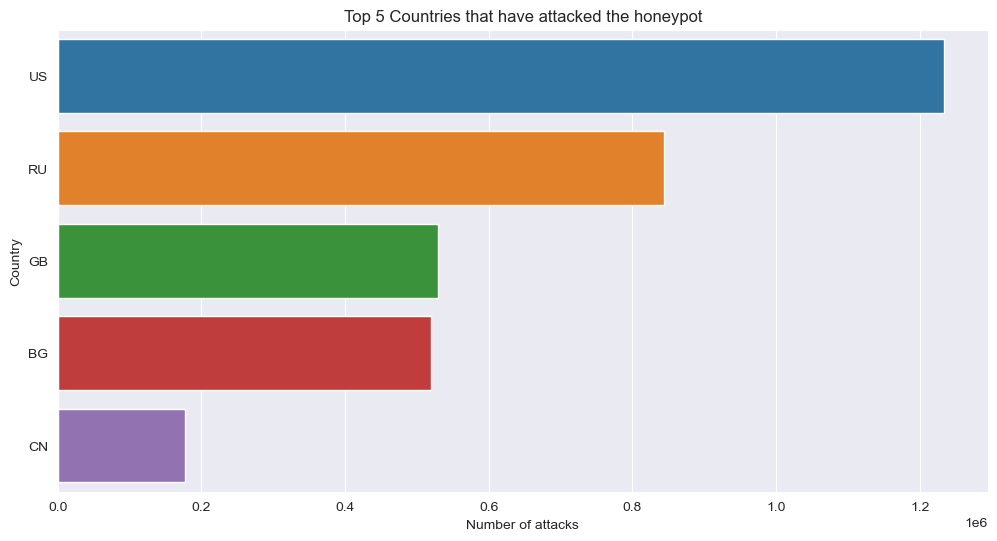

In [ ]:
# take the top 10 countries

df["country_code"].value_counts().head(10)

# get the columns of the top 10 countries
top_countries = df["country_code"].value_counts().head(5).index
top_ten_df = df[df["country_code"].isin(top_countries)]["country_code"]

# plot the top 10 countries sorted from largest to smallest
plt.figure(figsize=(12, 6))
sns.countplot(y=top_ten_df, order=top_ten_df.value_counts().index)

# set title and labels
plt.title('Top 5 Countries that have attacked the honeypot')
plt.xlabel('Number of attacks')
plt.ylabel('Country')

sns.set_style('darkgrid')

In [ ]:
df['time']

0           May 9, 2024 @ 12:00:00.000
1           May 9, 2024 @ 12:00:00.000
2           May 9, 2024 @ 12:00:00.000
3           May 9, 2024 @ 12:00:00.000
4           May 9, 2024 @ 12:00:00.000
                      ...             
5735747    May 16, 2024 @ 19:00:03.000
5735748    May 16, 2024 @ 19:00:03.000
5735749    May 16, 2024 @ 19:00:03.000
5735750    May 16, 2024 @ 19:00:03.000
5735751    May 16, 2024 @ 19:00:03.000
Name: time, Length: 5735752, dtype: object

In [ ]:
# feature engineer the time column into day of the week

df['time'] = pd.to_datetime(df['time'])
df['day_of_week'] = df['time'].dt.day_name()


# plot the day of the week that the attacks happened overall
sns.countplot(y=df.day, order=df.day.value_counts().index)
sns.set_style('darkgrid')

/var/folders/l0/7mds44615d94b437tm14dmb40000gn/T/ipykernel_62766/3042621277.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


DateParseError: Unknown datetime string format, unable to parse: May 9, 2024 @ 12:00:00.000, at position 0

<Axes: xlabel='city'>

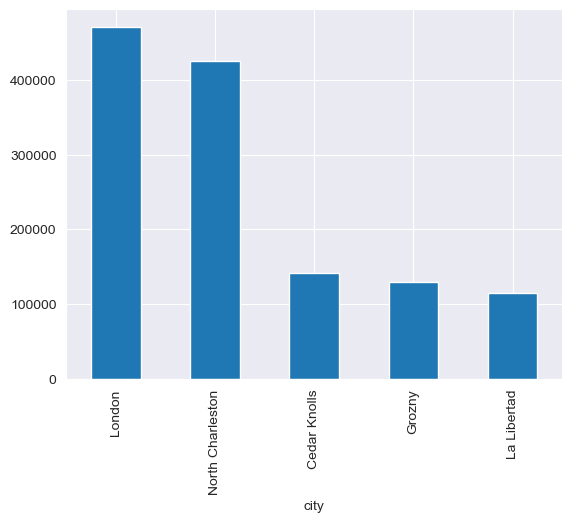

In [ ]:
df["city"].value_counts().head().plot.bar()

<Axes: xlabel='dest_port'>

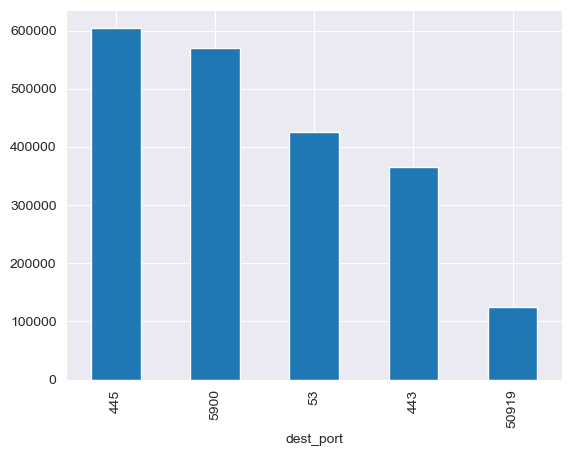

In [ ]:
df["dest_port"].value_counts().head().plot.bar()

<Axes: xlabel='type'>

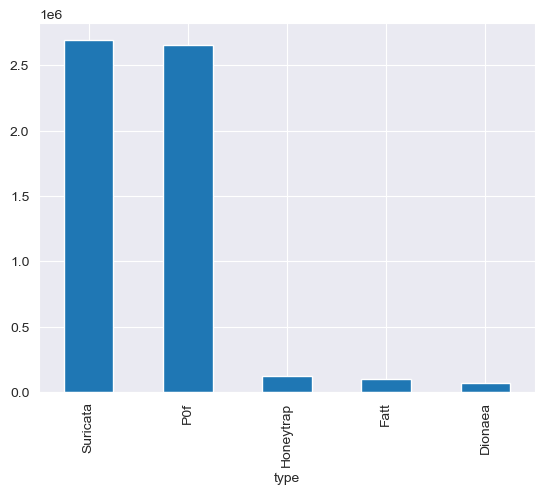

In [ ]:
df["type"].value_counts().head().plot.bar()

In [ ]:
df["country"].value_counts()

country
United States     1233088
Russia             843836
United Kingdom     529570
Bulgaria           518924
China              177752
                   ...   
Angola                 12
New Zealand            12
Yemen                  10
Senegal                10
Tunisia                10
Name: count, Length: 104, dtype: int64

In [ ]:
#ensure datetime format is correct
df['time'] = pd.to_datetime(df['time'], format='%m/%d/%y %H:%M')
# Plotting the distribution of intrusion events over time
plt.figure(figsize=(12, 6))
df["time"].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Intrusion Events Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

ValueError: time data "May 9, 2024 @ 12:00:00.000" doesn't match format "%m/%d/%y %H:%M", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Plotting the frequency of source country codes (Top N)
top_n = 10  # Adjust this value as needed
top_countries = df['cc'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title(f'Frequency of Source Country Codes (Top {top_n})')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

KeyError: 'cc'

In [ ]:
# Plotting the distribution of source port numbers
plt.figure(figsize=(12, 6))
df['spt'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Source Port Numbers')
plt.xlabel('Source Port Number')
plt.ylabel('Frequency')
plt.show()

KeyError: 'spt'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Plotting the distribution of destination port numbers
plt.figure(figsize=(12, 6))
df['dpt'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution of Destination Port Numbers')
plt.xlabel('Destination Port Number')
plt.ylabel('Frequency')
plt.show()

KeyError: 'dpt'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Plotting the frequency of communication protocols
plt.figure(figsize=(12, 6))
df['proto'].value_counts().plot(kind='bar')
plt.title('Frequency of Communication Protocols')
plt.xlabel('Protocol')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

KeyError: 'proto'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Get the top 10 countries by frequency
top_countries = df['cc'].value_counts().nlargest(10).index.tolist()

# Filter the dataframe to include only the top 10 countries
df_filtered = df[df['cc'].isin(top_countries)]

# Plotting the relationship between Source Country Code and Communication Protocol for top 10 countries
plt.figure(figsize=(10, 6))
pd.crosstab(df_filtered['cc'], df_filtered['proto']).plot(kind='bar', stacked=True)
plt.title('Relationship between Top 10 Source Country Codes and Communication Protocol')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

KeyError: 'cc'

In [ ]:
# Plotting the frequency of intrusion events over time for each host
plt.figure(figsize=(12, 6))
for host, group in df.groupby('host'):
    group.set_index('datetime').resample('D').size().plot(label=host)

plt.title('Intrusion Events Over Time by Host')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(title='Host')
plt.show()

KeyError: 'host'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# For specific countries are there days that they are more likely to attack the honeypot?
# plot the day of the week that the attacks happened for the top countries

# only top countries
sns.countplot(y=df.day, order=df.day.value_counts().index, hue=df.country, hue_order=top_countries)

# set title and labels
plt.title('Day of the week that cyber attacks occurred')
plt.xlabel('Number of attacks')
plt.ylabel('Day of the week')

plt.style.use('ggplot')
sns.set_style('darkgrid') 

AttributeError: 'DataFrame' object has no attribute 'day'

China attacks more on monday and tuesday. Iran attacks more on Wednesday some on monday and tuesday and almost never on other days. The United States attacks consistently on all days same with taiwan.

In [ ]:
# Creating histogram to determine distribution of host interceptions, goucha-tokyo has the highest amount of host interceptions. 
plt.figure(figsize=(10, 6))
sns.histplot(df['host'], bins=50, kde=False)
plt.title('Distribution of host')
plt.xlabel('host')
plt.yscale("log")
plt.ylabel('Frequency')
plt.show()

KeyError: 'host'

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Histogram representation of countries that are intercepting')

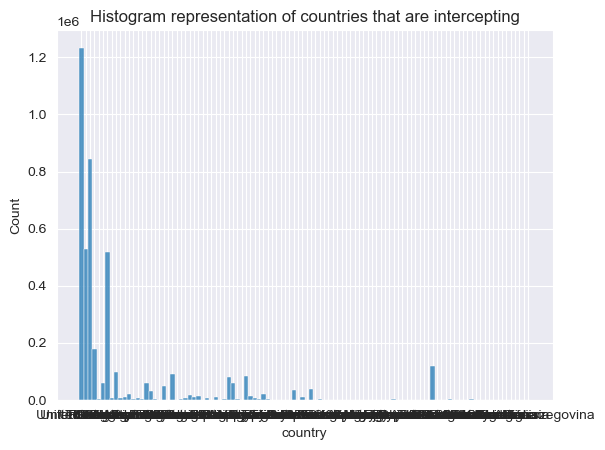

In [ ]:
#let's visualize where they are intercepting from
sns.histplot(data = df, x = "country")
plt.title('Histogram representation of countries that are intercepting')

In [ ]:
# View createst amount of interceptions per country, China is the highest and the U.S. is second. 
df.value_counts(['country'])

country       
United States     1233088
Russia             843836
United Kingdom     529570
Bulgaria           518924
China              177752
                   ...   
New Zealand            12
Nicaragua              12
Senegal                10
Tunisia                10
Yemen                  10
Name: count, Length: 104, dtype: int64

# What times are the attacks happening

In [ ]:
#let's sort our variables based on country and host status 
#first we need to create new section just with our variables 

country_host_h = df.groupby(['country', 'host']).size()
print("Country and their host status:", country_host_h)
print("   ")

KeyError: 'host'

In [ ]:
# sort attacks by morning, afternoon, evening and night

df['hour'] = pd.to_datetime(df.datetime).dt.hour

# function to sort the hours into morning, afternoon, evening and night

def sort_hours(hour):
    if hour >= 5 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 17:
        return 'afternoon'
    elif hour >= 17 and hour < 21:
        return 'evening'
    else:
        return 'night'
    
df['time_of_day'] = df.hour.apply(sort_hours)

# plot the time of day that the attacks happen

sns.countplot(y=df.time_of_day, order=df.time_of_day.value_counts().index)

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [ ]:
# group the attacks by country and time of day

grouped = df.groupby(['country', 'time_of_day']).size().reset_index(name='count')

# plot the grouped data

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', hue='time_of_day', data=grouped, order=top_countries)

# set title and labels
plt.title('Time of day that attacks happened for the top countries')

KeyError: 'time_of_day'

## Analysis of when the top 5 countries do their cyber attacks

The time of day that countries primarily do cyber attacks are at night. With the exception of Iran which does it's cyber attacks in the morning. The majority of cyber attacks happen in the morning or night. With the evening being the least amount of cyber attacks.

# Which months are the cyber attacks happening?

In [ ]:
# display most attacks on what month

df['month'] = pd.to_datetime(df.datetime).dt.month

# label the month

df['month'] = df['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# plot the month that the attacks happened overall

sns.countplot(y=df.month, order=df.month.value_counts().index)

AttributeError: 'DataFrame' object has no attribute 'datetime'

In [ ]:
# group by month and country

df['month'] = pd.to_datetime(df.datetime).dt.month_name()

grouped = df.groupby(['country', 'month']).size().reset_index(name='count')

# plot the grouped data

plt.figure(figsize=(12, 6))

sns.barplot(x='count', y='country', hue='month', data=grouped, order=top_countries)

# set title and labels
plt.title('Month that attacks happened for the top countries')


AttributeError: 'DataFrame' object has no attribute 'datetime'

In [ ]:
# pie chart of percentage of attacks per top 5 country

plt.figure(figsize=(8, 3))
df.country.value_counts().head(5).plot.pie(autopct='%1.1f%%')

# set title

plt.title('Percentage of attacks per top 5 country')

NameError: name 'plt' is not defined

## Cyber Attacks by Percentage

This pie chart represents the percentage of attacks coming from each country. China dominates the cyber attacks by having nearly 60% of all cyber attacks coming second is the United States with ~28%. 

### EDA ANALYSIS

1. Whaat insights have you learned from your EDA?

2. Which data transformations/column engineering do you need to implement to create a more interesting analysis?